# METHODOLOGY :

In [1]:
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner

In [2]:
import json # library to handle JSON files

# transforming json file into a pandas dataframe library
from pandas.io.json import json_normalize 

In [3]:
import requests # library to handle requests
import bs4 # Beautiful Soup library
from bs4 import BeautifulSoup # Beautiful Soup object

In [4]:
import folium # Map Plotting Library

In [5]:
# Matplotlib and associative plotting libraries

import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors

In [6]:
# importing K-MEANS from clustering stage

import sklearn
from sklearn.cluster import KMeans

In [7]:
# to warn and ignore exceptions that aren't necessarily exceptions

import warnings
warnings.filterwarnings('ignore')

## Explore California Hospitals Dataset

From the California Health and Human services Open Data Portal, i collected the hospitals and beds related data. It is available in 2 formats : <b>csv</b> & <b>xlsx</b>. The portal has the url to access both file formats and using <b>read_csv</b> method i converted it into a <b>pandas dataframe</b>

Due to the low population in <b>Alpine</b> and <b>Sierra</b> counties their related hospitals data is not available in the following csv file. So, in future i will be removing these 2 counties while cleaning counties population and coordinates data

In [8]:
csv_path='https://data.chhs.ca.gov/dataset/2df3e19e-9ee4-42a6-a087-9761f82033f6/resource/47af979d-8685-4981-bced-96a6b79d3ed5/download/covid19hospitalbycounty.csv'
cal_df = pd.read_csv(csv_path)
cal_df.head()

county todays_date  hospitalized_covid_confirmed_patients  \
0         Lassen  2020-03-29                                    0.0   
1           Yolo  2020-03-29                                    2.0   
2  San Francisco  2020-03-29                                   50.0   
3    Los Angeles  2020-03-29                                  489.0   
4      San Diego  2020-03-29                                  121.0   

   hospitalized_suspected_covid_patients  hospitalized_covid_patients  \
0                                    2.0                          NaN   
1                                    3.0                          NaN   
2                                   73.0                          NaN   
3                                 1132.0                          NaN   
4                                  211.0                          NaN   

   all_hospital_beds  icu_covid_confirmed_patients  \
0                NaN                           0.0   
1                NaN                           1.0   
2                NaN                          24.0   
3                NaN                         191.0   
4                NaN                          77.0   

   icu_suspected_covid_patients  icu_available_beds  
0                           0.0                 NaN  
1                           1.0                 0.0  
2                          10.0                61.0  
3                         182.0               345.0  
4                          39.0               205.0

As we can see this data is dated from <b>march 29, 2020</b>, by using the <b>tail</b> method it turned out that the latest data is dated to <b>june 1, 2021</b>. So, i've considered the hospital and beds data of only <b>june 1st 2021</b>

## Data Cleaning :

Drop columns : <b>todays_date, hospitalized_covid_confirmed_patients, hospitalized_suspected_covid_patients, hospitalized_covid_patients, icu_covid_confirmed_patients, icu_suspected_covid_patients </b> and sort the dataframe alphabetically based on counties

In [9]:
cal_df = cal_df.tail(56)
cal_df.drop(columns=['todays_date','hospitalized_covid_confirmed_patients','hospitalized_suspected_covid_patients','hospitalized_covid_patients','icu_covid_confirmed_patients','icu_suspected_covid_patients'],inplace=True)

In [10]:
cal_df.sort_values('county',inplace=True)
cal_df.reset_index(drop=True,inplace=True)
cal_df.head()

county  all_hospital_beds  icu_available_beds
0    Alameda             2493.0               110.0
1     Amador               53.0                 0.0
2      Butte              451.0                 7.0
3  Calaveras               33.0                 8.0
4     Colusa               48.0                 5.0

 Plotting bar graph for <b>Total Hospital Beds VS County</b>

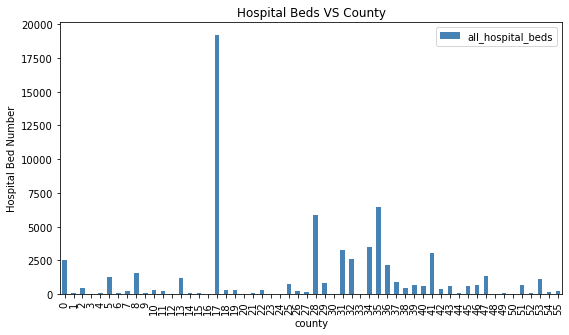

In [11]:
bar1_df = cal_df[['county','all_hospital_beds']]
bar1_df.plot(kind='bar',figsize=(9,5),color='steelblue')
plt.ylabel('Hospital Bed Number')
plt.xlabel('county')
plt.title('Hospital Beds VS County')
plt.show()

So <b>Los Angeles (index-17)</b> has the maximum number of total hospital beds in California State

In [13]:
print('{} County has the maximum number of hospitals beds in California with {} beds'.format(bar1_df.iloc[17,0],bar1_df.iloc[17,1]))

Los Angeles County has the maximum number of hospitals beds in California with 19186.0 beds


Now plotting bar graph for <b>ICU Beds VS County</b>

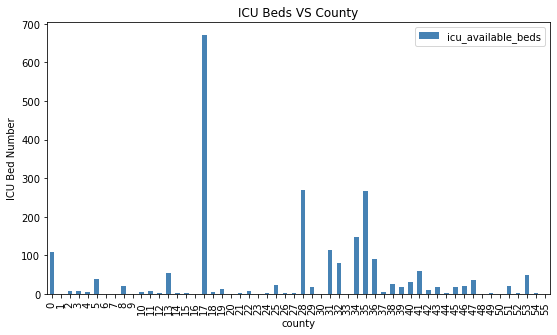

In [14]:
bar2_df = cal_df[['county','icu_available_beds']]
bar2_df.plot(kind='bar',figsize=(9,5),color='steelblue')
plt.ylabel('ICU Bed Number')
plt.xlabel('county')
plt.title('ICU Beds VS County')
plt.show()

Again <b>Los Angeles (index-17)</b> has the maximun number of ICU Beds

In [15]:
print('{} County has the maximum number of ICU Beds in California with {} beds'.format(bar2_df.iloc[17,0],bar2_df.iloc[17,1]))

Los Angeles County has the maximum number of ICU Beds in California with 670.0 beds


Let's see if any county has <b>0 ICU beds</b>

In [16]:
# counties with 0 icu_available_beds
no_beds_df = cal_df[cal_df['icu_available_beds']==0]
no_beds_df

county  all_hospital_beds  icu_available_beds
1       Amador               53.0                 0.0
6    Del Norte               53.0                 0.0
7    El Dorado              190.0                 0.0
9        Glenn               47.0                 0.0
16      Lassen               25.0                 0.0
20    Mariposa               14.0                 0.0
23       Modoc               12.0                 0.0
30      Plumas               35.0                 0.0
33  San Benito               25.0                 0.0
48      Sutter               14.0                 0.0
50     Trinity               25.0                 0.0

In total the above <b>11</b> counties have <b>0</b> ICU available Beds

## Explore and Cleaning Population Data of the Counties

I downloaded the population data from <a href='https://worldpopulationreview.com/us-counties/states/ca'>worldpopulationreview.com</a> website. And cleaned the data by removing GrowthRate and popDensity Columns. To avoid complications sort the dataframe alphabetically based on counties so that while merging dataframes it will be easy

In [18]:
pop_df = pd.read_csv('cal_pop_data.csv')
for county in pop_df['CTYNAME']:
    pop_df.replace(to_replace=county,value=county.rstrip('County'),inplace=True)
    
pop_df.sort_values('CTYNAME',inplace=True)
pop_df.reset_index(drop=True,inplace=True)
pop_df.head()

CTYNAME  pop2021  GrowthRate  popDensity
0    Alameda   1680480     11.0701   2273.7070
1     Alpine      1209      4.1344      1.6358
2     Amador     40446      6.7571     54.7239
3      Butte    196880    -10.4883    266.3807
4  Calaveras     46319      1.8716     62.6701

Remove <b>Alpine (index-1)</b> and <b>Sierra (index-45)</b> counties as discussed earlier

In [19]:
pop_df.drop([1,45],axis=0,inplace=True)    
pop_df.drop(columns=['GrowthRate','popDensity'],inplace=True)
pop_df.reset_index(drop=True,inplace=True)

In [20]:
pop_df.rename(columns={'pop2021':'population'},inplace=True)
pop_df.head()

CTYNAME  population
0    Alameda      1680480
1     Amador        40446
2      Butte       196880
3  Calaveras        46319
4     Colusa        21805

Now Plotting bar chart for <b>Population VS County</b>

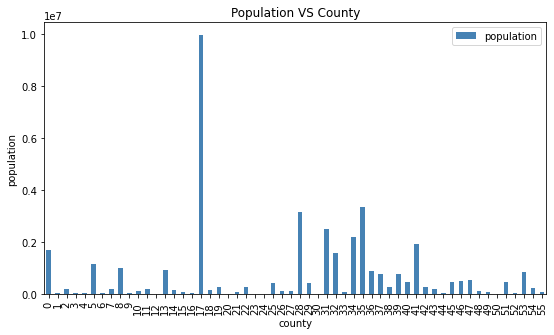

In [21]:
pop_df.plot(kind='bar',figsize=(9,5),color='steelblue')
plt.ylabel('population')
plt.xlabel('county')
plt.title('Population VS County')
plt.show()

<b>Los Angeles (index-17)</b> is the most populated county in California State and is the reason for having more hospital and ICU Beds

In [22]:
print('{} is the most populated county with {} population in California'.format(pop_df.iloc[17,0],pop_df.iloc[17,1]))

Los Angeles  is the most populated county with 9969510 population in California


In [23]:
cal_df=pd.concat([cal_df,pop_df],axis=1)
cal_df.drop(['CTYNAME'],axis=1,inplace=True)
cal_df.head()

county  all_hospital_beds  icu_available_beds  population
0    Alameda             2493.0               110.0     1680480
1     Amador               53.0                 0.0       40446
2      Butte              451.0                 7.0      196880
3  Calaveras               33.0                 8.0       46319
4     Colusa               48.0                 5.0       21805

## Explore and Cleaning Counties Coordinates data

Download the counties coordinates data <a href='https://simplemaps.com/data/us-cities'>here</a> 

In [24]:
us_counties_df = pd.read_csv('uscounties.csv')
us_counties_df.head()

county county_ascii  county_fips state_id  state_name      lat  \
0  Los Angeles  Los Angeles         6037       CA  California  34.3207   
1         Cook         Cook        17031       IL    Illinois  41.8401   
2       Harris       Harris        48201       TX       Texas  29.8577   
3     Maricopa     Maricopa         4013       AZ     Arizona  33.3490   
4    San Diego    San Diego         6073       CA  California  33.0341   

        lng  population  
0 -118.2248    10081570  
1  -87.8168     5198275  
2  -95.3936     4646630  
3 -112.4915     4328810  
4 -116.7353     3316073

Cleaning the data to get data related to california (<b>CA</b>) state

In [25]:
coor_df = us_counties_df[us_counties_df['state_id']=='CA']
coor_df.head()

county    county_ascii  county_fips state_id  state_name      lat  \
0      Los Angeles     Los Angeles         6037       CA  California  34.3207   
4        San Diego       San Diego         6073       CA  California  33.0341   
5           Orange          Orange         6059       CA  California  33.7030   
9        Riverside       Riverside         6065       CA  California  33.7437   
13  San Bernardino  San Bernardino         6071       CA  California  34.8414   

         lng  population  
0  -118.2248    10081570  
4  -116.7353     3316073  
5  -117.7611     3168044  
9  -115.9938     2411439  
13 -116.1784     2149031

Remove unnecessary columns, <b>Alpine</b> & <b>Sierra</b> counties <b>indexed 1, 45 respectively</b> and sort dataframe alphabetically based on counties

In [26]:
coor_df.drop(columns=['county_ascii','county_fips','state_id','state_name','population'],inplace=True)
coor_df.sort_values(by='county',inplace=True)
coor_df.reset_index(drop=True,inplace=True)

In [27]:
coor_df.drop([1,45],axis=0,inplace=True)
coor_df.reset_index(drop=True,inplace=True)
coor_df.head()

county      lat       lng
0    Alameda  37.6469 -121.8889
1     Amador  38.4464 -120.6511
2      Butte  39.6669 -121.6007
3  Calaveras  38.2046 -120.5541
4     Colusa  39.1775 -122.2370

Ensuring Alpine and Sierra counties are excluded from our dataset

In [28]:
cal_df = cal_df.merge(coor_df,how='inner',on='county')
cal_df.head()

county  all_hospital_beds  icu_available_beds  population      lat  \
0    Alameda             2493.0               110.0     1680480  37.6469   
1     Amador               53.0                 0.0       40446  38.4464   
2      Butte              451.0                 7.0      196880  39.6669   
3  Calaveras               33.0                 8.0       46319  38.2046   
4     Colusa               48.0                 5.0       21805  39.1775   

        lng  
0 -121.8889  
1 -120.6511  
2 -121.6007  
3 -120.5541  
4 -122.2370

In [29]:
cal_df.tail()

county  all_hospital_beds  icu_available_beds  population      lat  \
51    Tulare              673.0                22.0      469407  36.2201   
52  Tuolumne               72.0                 2.0       54660  38.0276   
53   Ventura             1106.0                50.0      841734  34.4565   
54      Yolo              128.0                 2.0      221264  38.6866   
55      Yuba              261.0                 1.0       80890  39.2690   

         lng  
51 -118.8005  
52 -119.9548  
53 -119.0836  
54 -121.9016  
55 -121.3513

## Final DataFrame

Including <b>Bed per 100 people</b> and <b>ICU Beds per 100 people</b>, we get our final dataframe

In [30]:
cal_df['Bed_per_100_people'] = (cal_df['all_hospital_beds']/cal_df['population'])*100
cal_df['ICU_Bed_per_100_people'] = (cal_df['icu_available_beds']/cal_df['population'])*100
cal_df.head()

county  all_hospital_beds  icu_available_beds  population      lat  \
0    Alameda             2493.0               110.0     1680480  37.6469   
1     Amador               53.0                 0.0       40446  38.4464   
2      Butte              451.0                 7.0      196880  39.6669   
3  Calaveras               33.0                 8.0       46319  38.2046   
4     Colusa               48.0                 5.0       21805  39.1775   

        lng  Bed_per_100_people  ICU_Bed_per_100_people  
0 -121.8889            0.148350                0.006546  
1 -120.6511            0.131039                0.000000  
2 -121.6007            0.229074                0.003555  
3 -120.5541            0.071245                0.017272  
4 -122.2370            0.220133                0.022931

Finding the counties with best beds per 100 people ratio

In [62]:
cal_df['Bed_per_100_people'].max()

0.3226604030164421

In [63]:
cal_df[cal_df['Bed_per_100_people']==0.3226604030164421]

Cluster_labels county  all_hospital_beds  icu_available_beds  population  \
55               5   Yuba              261.0                 1.0       80890   

       lat       lng  Bed_per_100_people  ICU_Bed_per_100_people  
55  39.269 -121.3513             0.32266                0.001236

So <b>Yuba County</b> with <b>0.32266</b> bpp ratio has the best beds per 100 people ratio

In [64]:
cal_df['ICU_Bed_per_100_people'].max()

0.022930520522815866

In [67]:
cal_df[cal_df['ICU_Bed_per_100_people']==0.022930520522815866]

Cluster_labels  county  all_hospital_beds  icu_available_beds  population  \
4               0  Colusa               48.0                 5.0       21805   

       lat      lng  Bed_per_100_people  ICU_Bed_per_100_people  
4  39.1775 -122.237            0.220133                0.022931

And <b>Colusa County</b> with <b>0.0293</b> ibp ratio has the best ICU beds per 100 people

## Leveraging Hospitals names and their coordinates data using FOURSQUARE API

Actually there isn't much to do with the foursquare API data. Since it is a mandatory criteria to leverage data through any API, I will be collecting the hospitals names and coordinates data to plot them on the california map

In [31]:
def get_hospital_data(lat, lng, county):
    radius = 100000
    LIMIT = 10000
    VERSION = '20180604'
    CLIENT_ID = 'WUFNSGI3YYKL1PRDX4FMMGA22S4FOC2PM2MWKI21ZNXFUCXT'
    CLIENT_SECRET = 'YM2KZBKMPVWZEASGMLBGMUUCJ5OACVEII1NZT34J0VSQMCZF'
    HOSPITAL_KEY = "4bf58dd8d48988d196941735"
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT,
        HOSPITAL_KEY)
    response = requests.get(url)
    if not response.status_code == 200:
        print("ERROR", response.status_code, response.content)
        return None
    results = response.json()
    venue_data = results["response"]["venues"]
    venue_details = []
    for row in venue_data:
        try:
            venue_id = row['id']
            venue_name = row['name']
            lat = row['location']['lat']
            lng = row['location']['lng']
            venue_details.append([venue_id, venue_name, lat, lng, county])
        except KeyError:
            pass

    column_names = ['ID', 'Name', 'Latitude','Longitude', 'county']
    df = pd.DataFrame(venue_details, columns=column_names)
    return df

In [32]:
def get_hospital_per_county(df):
    column_names = ['ID', 'Name', 'Latitude','Longitude', 'county']
    data = []
    for i, row in df.iterrows():
        h_df = get_hospital_data(row['lat'], row['lng'], row['county'])
        if h_df is not None:
            for x, hrow in h_df.iterrows():
                data.append([hrow[column] for column in column_names])
                
    cou_df = pd.DataFrame(data, columns=column_names)
    return cou_df

In [33]:
hospital_df = get_hospital_per_county(cal_df)

In [34]:
hospital_df.head()

ID  \
0  5d3d9ca51e4a070007882bc2   
1  4a73f4d8f964a520a2dd1fe3   
2  4a1dc9f8f964a520967b1fe3   
3  4a8f5a59f964a520091520e3   
4  52e694c611d265590dffd4e9   

                                                Name   Latitude   Longitude  \
0  Zuckerberg San Francisco General Hospital and ...  37.755659 -122.404956   
1                       Palo Alto Medical Foundation  37.548328 -121.973723   
2          Lucile Packard Children's Hospital (LPCH)  37.435998 -122.175331   
3                                 El Camino Hospital  37.369134 -122.079735   
4                                        One Medical  37.773986 -122.422218   

    county  
0  Alameda  
1  Alameda  
2  Alameda  
3  Alameda  
4  Alameda

In total i managed to collect <b>2245</b> hospitals names in california state using <b>Foursquare API</b> 

In [35]:
hospital_df.shape

(2245, 5)

In [36]:
hospital_df.drop(columns=['ID'],inplace=True)
hospital_df.head()

Name   Latitude   Longitude  \
0  Zuckerberg San Francisco General Hospital and ...  37.755659 -122.404956   
1                       Palo Alto Medical Foundation  37.548328 -121.973723   
2          Lucile Packard Children's Hospital (LPCH)  37.435998 -122.175331   
3                                 El Camino Hospital  37.369134 -122.079735   
4                                        One Medical  37.773986 -122.422218   

    county  
0  Alameda  
1  Alameda  
2  Alameda  
3  Alameda  
4  Alameda

More than half of the counties have 50 hospitals 

In [37]:
hospital_df['county'].value_counts()

Merced             50
Calaveras          50
Napa               50
Stanislaus         50
Solano             50
Sutter             50
Yuba               50
San Mateo          50
Alameda            50
Amador             50
San Diego          50
Ventura            50
Marin              50
Santa Cruz         50
Nevada             50
Placer             50
Colusa             50
San Joaquin        50
Contra Costa       50
Yolo               50
Orange             50
San Francisco      50
Los Angeles        50
Santa Clara        50
El Dorado          50
Sacramento         50
Sonoma             50
Imperial           49
San Benito         44
Kings              42
Plumas             41
Tulare             41
Kern               40
San Bernardino     40
Tehama             40
Mariposa           40
Fresno             39
Madera             39
Riverside          38
Butte              37
Santa Barbara      37
Tuolumne           36
Lake               36
Monterey           35
San Luis Obispo    35
Glenn     

Using <b>geopy</b> to get coordinates of California State

In [38]:
from geopy.geocoders import Nominatim

address = 'California, CA' 
geolocator = Nominatim(user_agent='ca_explorer')
location = geolocator.geocode(address)
lati = location.latitude
long = location.longitude

Mapping the hospitals in California folium Map

In [61]:
california_map = folium.Map(location=[lati,long],zoom_start=11)

for lat,lng,name,county in zip(hospital_df['Latitude'],hospital_df['Longitude'],hospital_df['Name'],hospital_df['county']):
    label = '{},{}'.format(name,county)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
          [lat,lng],
          popup=label,
          radius=5,
          color='blue',
          fill=True,
          fill_color='#3186cc',
          fill_opacity=0.7).add_to(california_map)
    
california_map    

## CLUSTERING 

For clustering we will be using the <b>population, Bed_per_100_people, ICU_Bed_per_100_people</b> columns of cal_df and name the resulting dataframe as clusters_df

In [40]:
clusters_df = cal_df.drop(columns=['county','all_hospital_beds','icu_available_beds','lat','lng'])
clusters_df.head()

population  Bed_per_100_people  ICU_Bed_per_100_people
0     1680480            0.148350                0.006546
1       40446            0.131039                0.000000
2      196880            0.229074                0.003555
3       46319            0.071245                0.017272
4       21805            0.220133                0.022931

<b>NORMALIZING DATA</b> that we will be using for clustering

In [41]:
clusters_df = sklearn.preprocessing.StandardScaler().fit_transform(clusters_df)
clusters_df

array([[ 6.62240887e-01,  4.03480218e-02,  4.31304040e-01],
       [-4.53798117e-01, -2.56326558e-01, -1.05146836e+00],
       [-3.47345174e-01,  1.42372949e+00, -2.46068415e-01],
       [-4.49801555e-01, -1.28103615e+00,  2.86095613e+00],
       [-4.66483271e-01,  1.27051194e+00,  4.14285605e+00],
       [ 3.07742530e-01, -5.91005392e-01, -2.89575281e-01],
       [-4.62297531e-01,  7.46976069e-01, -1.05146836e+00],
       [-3.47238336e-01, -8.49456635e-01, -1.05146836e+00],
       [ 2.08294628e-01,  1.25944117e-01, -5.59704129e-01],
       [-4.61420369e-01,  2.52179001e-01, -1.05146836e+00],
       [-3.90008283e-01,  9.97362460e-01, -3.85855519e-02],
       [-3.58424354e-01, -2.62541709e-01, -4.80320731e-02],
       [-4.68919452e-01,  2.24945185e-01,  1.43439707e+00],
       [ 1.40033926e-01, -3.19207271e-01,  3.13002482e-01],
       [-3.75125803e-01, -1.42579711e+00, -6.16000668e-01],
       [-4.37413099e-01, -8.02169318e-01,  1.74201512e-03],
       [-4.60577913e-01, -1.09650325e+00

We will be using <b>Silhouette_score</b> to find the <b>optimum number of clusters</b>. It is a good indication that the underlying model fits best at that point.

In [42]:
def plot_kmeans(dataset):
    obs = dataset.copy()
    silhouette_score_values = list()
    number_of_clusters = range(3, 30)
    for i in number_of_clusters:
        classifier = KMeans(i, init='k-means++', n_init=10,max_iter=300, tol=0.0001, random_state=10)
        classifier.fit(obs)
        labels = classifier.predict(obs)
        silhouette_score_values.append(sklearn.metrics.silhouette_score(obs, labels, metric='euclidean', random_state=0))

    plt.plot(number_of_clusters, silhouette_score_values)
    plt.title("Silhouette score values vs Numbers of Clusters ")
    plt.show()

    optimum_number_of_components = number_of_clusters[silhouette_score_values.index(max(silhouette_score_values))]
    print("Optimal number of components is: ",optimum_number_of_components)

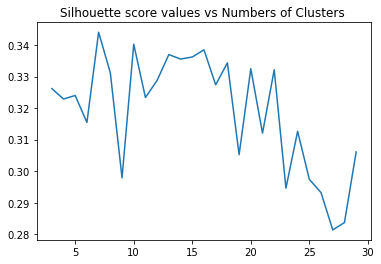

Optimal number of components is:  7


In [43]:
plot_kmeans(clusters_df)

The score suggests us to have <b>7</b> clusters

In [45]:
kclusters = 7
kmeans = KMeans(n_clusters=kclusters, random_state = 0)
kmeans.fit(clusters_df)
kmeans.labels_

array([4, 1, 5, 0, 0, 6, 1, 3, 1, 1, 1, 6, 0, 6, 3, 6, 3, 2, 1, 6, 3, 3,
       3, 1, 0, 6, 1, 6, 4, 1, 1, 4, 4, 3, 4, 4, 5, 3, 6, 3, 6, 4, 6, 5,
       6, 6, 6, 5, 3, 3, 1, 6, 6, 6, 3, 5], dtype=int32)

Inserting the cluster labels in cal_df in Cluster_labels column

In [46]:
cal_df.insert(0,'Cluster_labels',kmeans.labels_)
cal_df.head()

Cluster_labels     county  all_hospital_beds  icu_available_beds  \
0               4    Alameda             2493.0               110.0   
1               1     Amador               53.0                 0.0   
2               5      Butte              451.0                 7.0   
3               0  Calaveras               33.0                 8.0   
4               0     Colusa               48.0                 5.0   

   population      lat       lng  Bed_per_100_people  ICU_Bed_per_100_people  
0     1680480  37.6469 -121.8889            0.148350                0.006546  
1       40446  38.4464 -120.6511            0.131039                0.000000  
2      196880  39.6669 -121.6007            0.229074                0.003555  
3       46319  38.2046 -120.5541            0.071245                0.017272  
4       21805  39.1775 -122.2370            0.220133                0.022931

The following function is to save the <b>folium maps</b> as <b>html files</b>

In [47]:
def save_map(m,filepath):
    m.save(filepath)

Finally let's visualize the resulting clusters

In [48]:
# clusters based on Bed_per_100_people

bpp_clusters_map = folium.Map(location=[lati,long],zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# boosts are provided to increase the size of the circle markers 
m_boost = 5
add_boost = 10

markers_colors=[]
for lat,lng,cluster,county,bpp in zip(cal_df['lat'],cal_df['lng'],cal_df['Cluster_labels'],cal_df['county'],clusters_df[:,1]):
    label = 'Cluster '+ str(cluster) +', '+ str(county) + ' county'
    label = folium.Popup(label,parse_html=True)
    
    folium.CircleMarker(
         [lat,lng],
         radius = bpp*m_boost+add_boost, # size based on bed per 100 people
         popup=label,
         color = rainbow[cluster-1],
         fill = True,
         fill_color = rainbow[cluster-1],
         fill_opacity = 0.7).add_to(bpp_clusters_map)

bpp_clusters_map

In [59]:
#save_map(bpp_clusters_map,'bpp_cluster_map.html')

In [49]:
# clusters based on ICU_Beds_per_100_people

icu_clusters_map = folium.Map(location=[lati,long],zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# boosts are provided to increase the size of the circle markers
m_boost = 5
add_boost = 10

markers_colors=[]
for lat,lng,cluster,county,bpp in zip(cal_df['lat'],cal_df['lng'],cal_df['Cluster_labels'],cal_df['county'],clusters_df[:,2]):
    label = 'Cluster '+ str(cluster) +', '+ str(county) + ' county'
    label = folium.Popup(label,parse_html=True)
    
    folium.CircleMarker(
         [lat,lng],
         radius = bpp*m_boost+add_boost, # size based on ICU bed per 100 people
         popup=label,
         color = rainbow[cluster-1],
         fill = True,
         fill_color = rainbow[cluster-1],
         fill_opacity = 0.7).add_to(icu_clusters_map)

icu_clusters_map

In [60]:
#save_map(icu_clusters_map,'icu_cluster_map.html')

Scatter plot for Beds_per_100_people

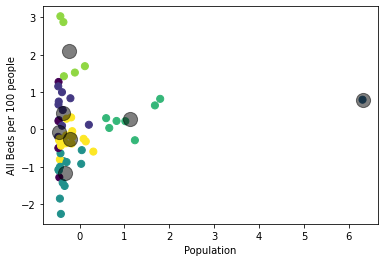

In [50]:
y_kmeans = kmeans.predict(clusters_df)
plt.scatter(clusters_df[:, 0], clusters_df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Population')
plt.ylabel('All Beds per 100 people')
plt.show()

Scatter Plot for ICU_Bed_per_100_people

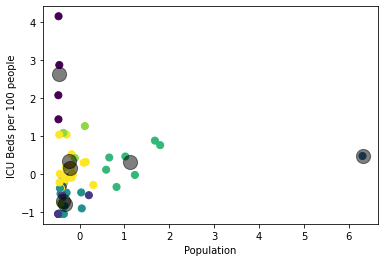

In [51]:
y_kmeans = kmeans.predict(clusters_df)
plt.scatter(clusters_df[:, 0], clusters_df[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
plt.xlabel('Population')
plt.ylabel('ICU Beds per 100 people')
plt.show()

The only outlier in the above 2 scatter plots is <b>Los Angeles County</b> because of it's high Population and it's resulting high number of hospital and ICU beds. We can also clearly see that by examining each cluster seperately.

## Examine Clusters

Now, you can examine each cluster. And based on the defining categories, you can then assign a name to each cluster.

#### Cluster 1

In [52]:
cal_df[cal_df['Cluster_labels']==0]

Cluster_labels     county  all_hospital_beds  icu_available_beds  \
3                0  Calaveras               33.0                 8.0   
4                0     Colusa               48.0                 5.0   
12               0       Inyo               29.0                 2.0   
24               0       Mono               17.0                 2.0   

    population      lat       lng  Bed_per_100_people  ICU_Bed_per_100_people  
3        46319  38.2046 -120.5541            0.071245                0.017272  
4        21805  39.1775 -122.2370            0.220133                0.022931  
12       18225  36.5111 -117.4107            0.159122                0.010974  
24       14526  37.9391 -118.8868            0.117032                0.013768

#### Cluster 2

In [53]:
cal_df[cal_df['Cluster_labels']==1]

Cluster_labels     county  all_hospital_beds  icu_available_beds  \
1                1     Amador               53.0                 0.0   
6                1  Del Norte               53.0                 0.0   
8                1     Fresno             1554.0                22.0   
9                1      Glenn               47.0                 0.0   
10               1   Humboldt              274.0                 6.0   
18               1     Madera              279.0                 5.0   
23               1      Modoc               12.0                 0.0   
26               1       Napa              206.0                 3.0   
29               1     Placer              799.0                18.0   
30               1     Plumas               35.0                 0.0   
50               1    Trinity               25.0                 0.0   

    population      lat       lng  Bed_per_100_people  ICU_Bed_per_100_people  
1        40446  38.4464 -120.6511            0.131039                0.000000  
6        27956  41.7431 -123.8972            0.189584                0.000000  
8      1013400  36.7582 -119.6493            0.153345                0.002171  
9        29245  39.5982 -122.3920            0.160711                0.000000  
10      134186  40.6993 -123.8756            0.204194                0.004471  
18      158217  37.2180 -119.7627            0.176340                0.003160  
23        8923  41.5898 -120.7250            0.134484                0.000000  
26      135654  38.5065 -122.3305            0.151857                0.002212  
29      410327  39.0635 -120.7175            0.194723                0.004387  
30       18939  40.0046 -120.8385            0.184804                0.000000  
50       11721  40.6507 -123.1126            0.213292                0.000000

#### Cluster 3

In [54]:
cal_df[cal_df['Cluster_labels']==2]

Cluster_labels       county  all_hospital_beds  icu_available_beds  \
17               2  Los Angeles            19186.0               670.0   

    population      lat       lng  Bed_per_100_people  ICU_Bed_per_100_people  
17     9969510  34.3207 -118.2248            0.192447                 0.00672

As discussed earlier <b>Los Angeles county (cluster-2)</b> is an outlier since it is the only county in cluster-2

#### Cluster 4

In [55]:
cal_df[cal_df['Cluster_labels']==3]

Cluster_labels       county  all_hospital_beds  icu_available_beds  \
7                3    El Dorado              190.0                 0.0   
14               3        Kings               98.0                 3.0   
16               3       Lassen               25.0                 0.0   
20               3     Mariposa               14.0                 0.0   
21               3    Mendocino               93.0                 2.0   
22               3       Merced              271.0                 7.0   
33               3   San Benito               25.0                 0.0   
37               3  San Joaquin              889.0                 5.0   
39               3    San Mateo              704.0                19.0   
48               3       Sutter               14.0                 0.0   
49               3       Tehama               59.0                 2.0   
54               3         Yolo              128.0                 2.0   

    population      lat       lng  Bed_per_100_people  ICU_Bed_per_100_people  
7       197037  38.7787 -120.5247            0.096429                0.000000  
14      156056  36.0753 -119.8155            0.062798                0.001922  
16       30483  40.6736 -120.5943            0.082013                0.000000  
20       16799  37.5815 -119.9054            0.083338                0.000000  
21       85445  39.4402 -123.3915            0.108842                0.002341  
22      284738  37.1919 -120.7177            0.095175                0.002458  
33       65490  36.6057 -121.0750            0.038174                0.000000  
37      781462  37.9348 -121.2714            0.113761                0.000640  
39      762357  37.4229 -122.3290            0.092345                0.002492  
48       98217  39.0346 -121.6948            0.014254                0.000000  
49       67216  40.1256 -122.2341            0.087777                0.002975  
54      221264  38.6866 -121.9016            0.057849                0.000904

#### Cluster 5

In [56]:
cal_df[cal_df['Cluster_labels']==4]

Cluster_labels          county  all_hospital_beds  icu_available_beds  \
0                4         Alameda             2493.0               110.0   
28               4          Orange             5828.0               270.0   
31               4       Riverside             3256.0               114.0   
32               4      Sacramento             2584.0                81.0   
34               4  San Bernardino             3507.0               147.0   
35               4       San Diego             6486.0               267.0   
41               4     Santa Clara             3057.0                60.0   

    population      lat       lng  Bed_per_100_people  ICU_Bed_per_100_people  
0      1680480  37.6469 -121.8889            0.148350                0.006546  
28     3175130  33.7030 -117.7611            0.183552                0.008504  
31     2520060  33.7437 -115.9938            0.129203                0.004524  
32     1578680  38.4493 -121.3443            0.163681                0.005131  
34     2206750  34.8414 -116.1784            0.158921                0.006661  
35     3347270  33.0341 -116.7353            0.193770                0.007977  
41     1918880  37.2318 -121.6951            0.159312                0.003127

#### Cluster 6

In [57]:
cal_df[cal_df['Cluster_labels']==5]

Cluster_labels         county  all_hospital_beds  icu_available_beds  \
2                5          Butte              451.0                 7.0   
36               5  San Francisco             2162.0                90.0   
43               5         Shasta              567.0                17.0   
47               5     Stanislaus             1305.0                36.0   
55               5           Yuba              261.0                 1.0   

    population      lat       lng  Bed_per_100_people  ICU_Bed_per_100_people  
2       196880  39.6669 -121.6007            0.229074                0.003555  
36      883255  37.7562 -122.4430            0.244776                0.010190  
43      180822  40.7637 -122.0405            0.313568                0.009402  
47      555728  37.5591 -120.9977            0.234827                0.006478  
55       80890  39.2690 -121.3513            0.322660                0.001236

#### Cluster 7

In [58]:
cal_df[cal_df['Cluster_labels']==6]

Cluster_labels           county  all_hospital_beds  icu_available_beds  \
5                6     Contra Costa             1293.0                39.0   
11               6         Imperial              236.0                 8.0   
13               6             Kern             1163.0                55.0   
15               6             Lake               64.0                 3.0   
19               6            Marin              320.0                14.0   
25               6         Monterey              716.0                24.0   
27               6           Nevada              121.0                 3.0   
38               6  San Luis Obispo              460.0                26.0   
40               6    Santa Barbara              603.0                31.0   
42               6       Santa Cruz              372.0                11.0   
44               6         Siskiyou               56.0                 4.0   
45               6           Solano              560.0                19.0   
46               6           Sonoma              655.0                22.0   
51               6           Tulare              673.0                22.0   
52               6         Tuolumne               72.0                 2.0   
53               6          Ventura             1106.0                50.0   

    population      lat       lng  Bed_per_100_people  ICU_Bed_per_100_people  
5      1159540  37.9191 -121.9278            0.111510                0.003363  
11      180599  33.0395 -115.3654            0.130676                0.004430  
13      913090  35.3429 -118.7299            0.127370                0.006024  
15       64524  39.0996 -122.7532            0.099188                0.004649  
19      257154  38.0734 -122.7234            0.124439                0.005444  
25      434283  36.2172 -121.2392            0.164869                0.005526  
27      100249  39.3014 -120.7685            0.120699                0.002993  
38      282625  35.3871 -120.4045            0.162760                0.009199  
40      447937  34.6729 -120.0165            0.134617                0.006921  
42      271957  37.0562 -122.0018            0.136786                0.004045  
44       43517  41.5927 -122.5404            0.128685                0.009192  
45      451479  38.2700 -121.9329            0.124037                0.004208  
46      485722  38.5283 -122.8874            0.134851                0.004529  
51      469407  36.2201 -118.8005            0.143372                0.004687  
52       54660  38.0276 -119.9548            0.131723                0.003659  
53      841734  34.4565 -119.0836            0.131395                0.005940